In [5]:
%matplotlib inline

In [6]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#read file
file1 = 'song_data.csv'
file2 = 'song_info.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [8]:
#combine data from 2 files
song_merged = pd.merge(df1,df2,how="inner",left_index=True, right_index=True)

In [10]:
#check for song_name values
#song_merged.iloc[7018]
#song_sorted = song_merged.sort_values(by=["song_name_x","artist_name", "album_names"], ascending=True)
#song_sorted

In [11]:
#change column name  => will not be necessary, it will be deleted after cleaning data
#song_merged = song_merged.rename(columns={"song_name_x":"song_name"})
#song_merged

In [12]:
#clean data
#delete duplicated song_name ana all column's data except album_name

#delete unnecessary columns
#del song_merged["song_name_y"]
#df.drop('a', axis=1, inplace=True) on Table
song_deleted = song_merged.drop(columns=["playlist", "song_name_y"])

#change column name
song_deleted.columns = song_deleted.columns.str.replace("song_name_x","song_name")
#18835 song_deleted.count()

#delete duplicate
#song_deleted.drop_duplicates(subset ="First Name",keep = False, inplace = True) 
#song_deleted.drop_duplicates(keep = False, inplace = True) 
song_deleted.drop_duplicates(inplace = True) 
#song_deleted.count()

#sort by popularity
song_data = song_deleted.sort_values("song_popularity")

In [13]:
#check sorted data : 14927 rows x 17 columns with song name
#song_data.head()

In [14]:
#clean unnecessary columns 
song_data = song_data.drop(columns=["song_name", "artist_name", "album_names"])
#song_data.count()  # 14927 x14
song_data.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4014,0,224306,0.026100,0.538,0.956,0.000147,9,0.2790,-4.022,1,0.1230,150.028,4,0.720
1078,0,199087,0.105000,0.632,0.646,0.000000,2,0.0454,-7.200,1,0.0519,137.933,4,0.777
17215,0,245173,0.036100,0.765,0.646,0.000001,1,0.2820,-7.101,1,0.3390,163.908,4,0.667
18549,0,292373,0.061600,0.580,0.353,0.000043,0,0.1280,-9.295,1,0.0265,141.987,4,0.242
8421,0,178693,0.000193,0.546,0.815,0.000017,9,0.0461,-6.621,1,0.0513,93.512,4,0.728


In [15]:
#check song_popularity for x_axis value  : 0 to 100, increased on 1
#ss = song_data["song_popularity"].unique()
#ss.sort()
#ss

In [16]:
# study about song_popularity freq
# 100 = max value of song_popularity
max_value = song_data["song_popularity"].max()
min_value = song_data["song_popularity"].min()
len_value = len(song_data["song_popularity"].unique())

freq = song_data["song_popularity"].value_counts()
#freq.dtypes int64

#create table
s = song_data["song_popularity"].value_counts() 
song_pop = pd.DataFrame({'popularity':s.index, 'freq':s.values})
song_pop = song_pop.sort_values("popularity")
#song_pop

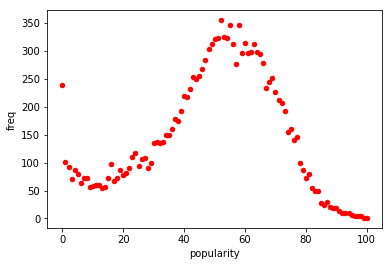

In [17]:
#graph popularity freq
#pop
##x_axis = np.arange(0, len_value, 20)
##y_axis = song_pop["freq"]
##plt.plot(x_axis, y_axis)
##plt.show()
song_pop.plot(kind='scatter',x='popularity',y='freq',color='red')
plt.show()

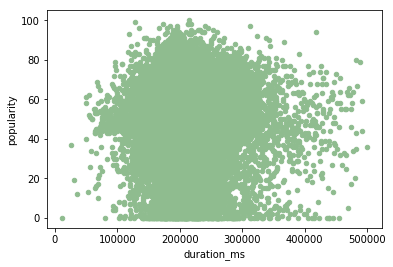

In [18]:
# study about song_popularity & duration
# 100 = max value of song_popularity
dura_max_value = song_data["song_duration_ms"].max() #1799346 29.99min  , 30min = 1,800,000
dura_min_value = song_data["song_duration_ms"].min() #12000   0.2min   , 1min = 60,000
dura_len_value = len(song_data["song_duration_ms"].unique())  #11771 

song_dura = song_data[["song_duration_ms", "song_popularity"]]
song_dura = song_dura.rename(columns={"song_duration_ms":"duration_ms","song_popularity":"popularity" })
#song_dura
#song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='red')
#plt.show()

#cut data
song_dura = song_dura[song_dura.duration_ms < 500000]
song_dura.plot(kind='scatter',x='duration_ms',y='popularity',color='darkseagreen')
plt.show()

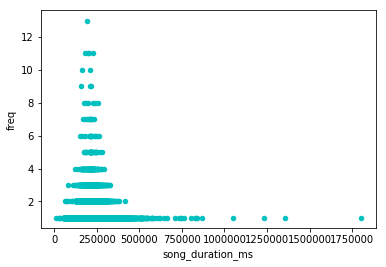

In [19]:
# freq of song_duration_ms
freq = song_data["song_duration_ms"].value_counts()
s = song_data["song_duration_ms"].value_counts() 
song_dura = pd.DataFrame({'song_duration_ms':s.index, 'freq':s.values})
song_dura.plot(kind='scatter',x='song_duration_ms',y='freq',color='c')
plt.show()

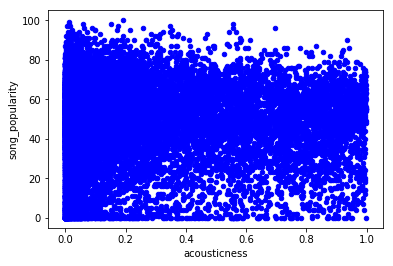

In [20]:
song_data.plot(kind='scatter',x='acousticness',y='song_popularity',color='blue')
plt.show()

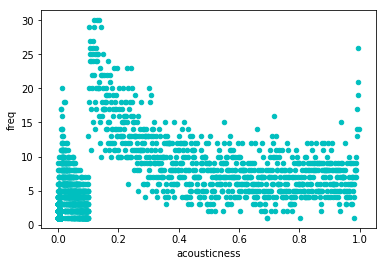

In [21]:
# freq of acousticness
freq = song_data["acousticness"].value_counts()
s = song_data["acousticness"].value_counts() 
song_acu = pd.DataFrame({'acousticness':s.index, 'freq':s.values})
song_acu.plot(kind='scatter',x='acousticness',y='freq',color='c')
plt.show()

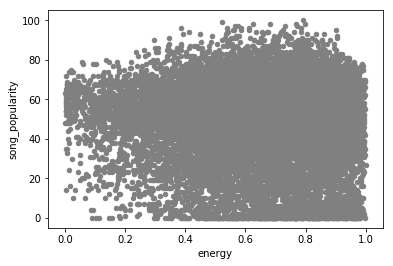

In [22]:
song_data.plot(kind='scatter',x='energy',y='song_popularity',color='grey')
plt.show()

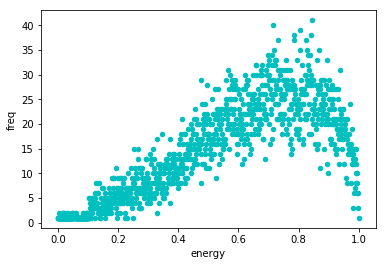

In [23]:
# freq of energy
freq = song_data["energy"].value_counts()
s = song_data["energy"].value_counts() 
song_energy = pd.DataFrame({'energy':s.index, 'freq':s.values})
song_energy.plot(kind='scatter',x='energy',y='freq',color='c')
plt.show()

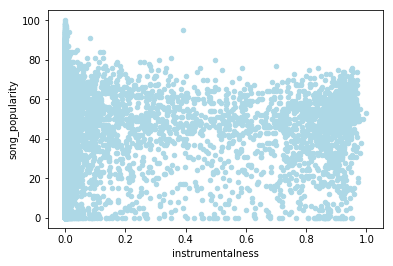

In [24]:
song_data.plot(kind='scatter',x='instrumentalness',y='song_popularity',color='lightblue')
plt.show()

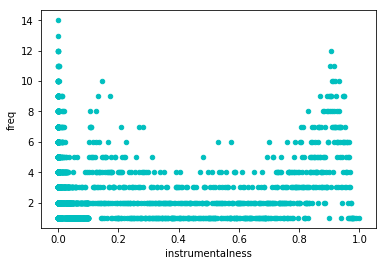

In [25]:
# freq of instrumentalness
freq = song_data["instrumentalness"].value_counts()
s = song_data["instrumentalness"].value_counts() 
song_inst = pd.DataFrame({'instrumentalness':s.index, 'freq':s.values})

song_inst = song_inst[song_inst.instrumentalness > 0]
song_inst.plot(kind='scatter',x='instrumentalness',y='freq',color='c')
plt.show()

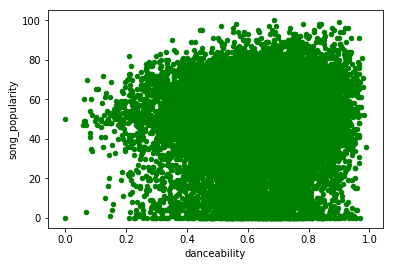

In [26]:
song_data.plot(kind='scatter',x='danceability',y='song_popularity',color='green')
plt.show()

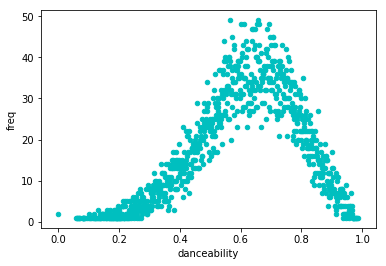

In [27]:
# freq of danceability
freq = song_data["danceability"].value_counts()
s = song_data["danceability"].value_counts() 
song_dance = pd.DataFrame({'danceability':s.index, 'freq':s.values})
song_dance.plot(kind='scatter',x='danceability',y='freq',color='c')
plt.show()

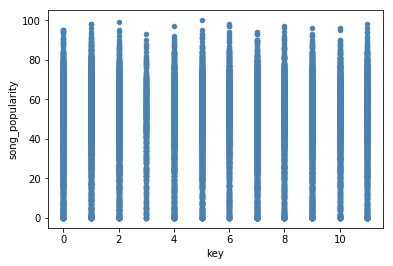

In [28]:
song_data.plot(kind='scatter',x='key',y='song_popularity',color='steelblue')
plt.show()

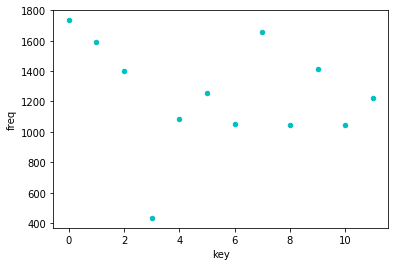

In [29]:
# freq of key
freq = song_data["key"].value_counts()
s = song_data["key"].value_counts() 
song_key = pd.DataFrame({'key':s.index, 'freq':s.values})
song_key.plot(kind='scatter',x='key',y='freq',color='c')
plt.show()

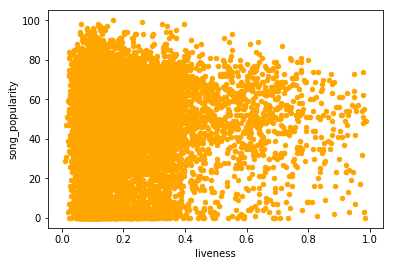

In [30]:
song_data.plot(kind='scatter',x='liveness',y='song_popularity',color='orange')
plt.show()

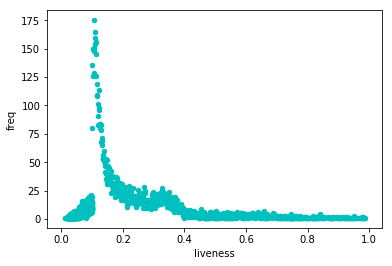

In [31]:
# freq of liveness
freq = song_data["liveness"].value_counts()
s = song_data["liveness"].value_counts() 
song_live = pd.DataFrame({'liveness':s.index, 'freq':s.values})
song_live.plot(kind='scatter',x='liveness',y='freq',color='c')
plt.show()

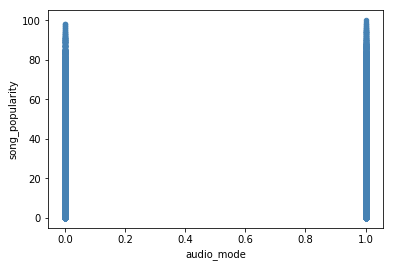

In [34]:
song_data.plot(kind='scatter',x='audio_mode',y='song_popularity',color='steelblue')
plt.show()

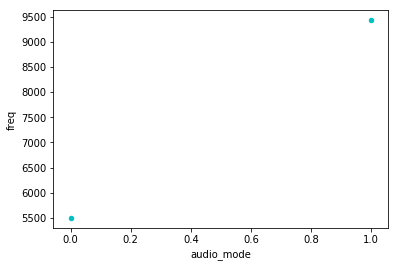

In [35]:
# freq of audio_mode
freq = song_data["audio_mode"].value_counts()
s = song_data["audio_mode"].value_counts() 
song_audio = pd.DataFrame({'audio_mode':s.index, 'freq':s.values})
song_audio.plot(kind='scatter',x='audio_mode',y='freq',color='c')
plt.show()

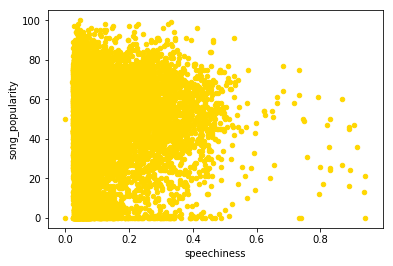

In [36]:
song_data.plot(kind='scatter',x='speechiness',y='song_popularity',color='gold')
plt.show()

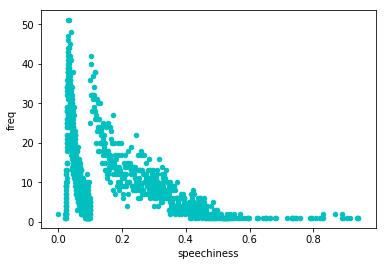

In [37]:
# freq of speechiness
freq = song_data["speechiness"].value_counts()
s = song_data["speechiness"].value_counts() 
song_speech = pd.DataFrame({'speechiness':s.index, 'freq':s.values})
song_speech.plot(kind='scatter',x='speechiness',y='freq',color='c')
plt.show()

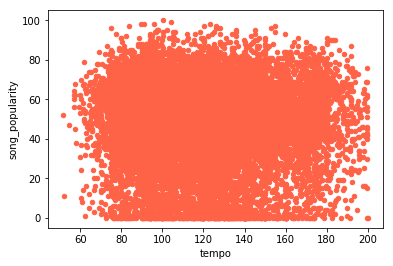

In [38]:
#song_data.plot(kind='scatter',x='tempo',y='song_popularity',color='tomato')

#cut data
song_tempo = song_data[(song_data.tempo > 50) & (song_data.tempo < 200)]
song_tempo.plot(kind='scatter',x='tempo',y='song_popularity',color='tomato')

plt.show()

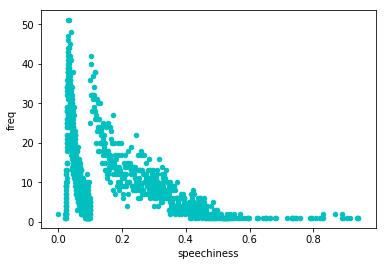

In [39]:
# freq of speechiness
freq = song_data["speechiness"].value_counts()
s = song_data["speechiness"].value_counts() 
song_speech = pd.DataFrame({'speechiness':s.index, 'freq':s.values})
song_speech.plot(kind='scatter',x='speechiness',y='freq',color='c')
plt.show()

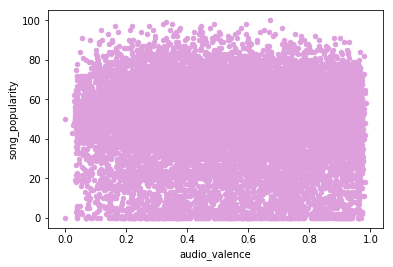

In [40]:
#audio_valence
song_data.plot(kind='scatter',x='audio_valence',y='song_popularity',color='plum')
plt.show()

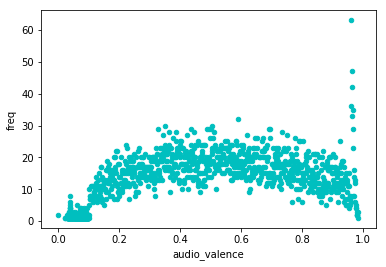

0.9610    63
0.9640    47
0.9620    42
0.9600    36
0.9660    35
0.9630    33
0.5910    32
0.3500    30
0.5050    30
0.6900    29
0.3290    29
0.4930    29
0.4340    29
0.6940    29
0.4890    29
0.9650    29
0.5010    29
0.7330    28
0.3850    28
0.5100    28
0.4470    28
0.3640    28
0.7510    27
0.3450    27
0.6200    27
0.4220    27
0.6960    26
0.7770    26
0.6510    26
0.4990    26
          ..
0.0919     1
0.0858     1
0.0364     1
0.0801     1
0.0592     1
0.0691     1
0.0446     1
0.0850     1
0.0451     1
0.0662     1
0.0331     1
0.0640     1
0.0528     1
0.0781     1
0.0842     1
0.0774     1
0.0534     1
0.0740     1
0.0729     1
0.0909     1
0.0633     1
0.0833     1
0.0879     1
0.0635     1
0.0566     1
0.0712     1
0.0745     1
0.0576     1
0.0982     1
0.0492     1
Name: audio_valence, Length: 1246, dtype: int64

In [46]:
# freq of audio_valence
freq = song_data["audio_valence"].value_counts()
s = song_data["audio_valence"].value_counts() 
song_valence = pd.DataFrame({'audio_valence':s.index, 'freq':s.values})
song_valence.plot(kind='scatter',x='audio_valence',y='freq',color='c')
plt.show()

In [47]:
x = "danceability"
y = "audio_valence"

fig, (ax1, ax2) = song_data.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(song_data[x], song_data[y], bins=20)
ax1.hist(song_data["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

AttributeError: 'DataFrame' object has no attribute 'subplots'